# Color Quantization using K-Means
In this piece I follow the Scikit Learn clustering examlpe to reduce the size of an image by reducing the amount of different colors in it. The colors are reduced by clustering colors from the original image to 64 clusters. In comparison, the picture is also reduced by random to show the difference the clustering makes. 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from time import time
from sklearn.metrics import pairwise_distances_argmin

In [16]:
colors_n = 32

In [38]:
# Load the image
from PIL import Image
forest = Image.open('forest.jpg')
print(forest)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=6000x4000 at 0x1A3F471DA0>


In [20]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
forest = np.array(forest, dtype=np.float64) / 255
print(forest)

[[[1.18808000e-05 1.32075898e-05 1.40519107e-05]
  [1.18808000e-05 1.32075898e-05 1.40519107e-05]
  [1.18808000e-05 1.32075898e-05 1.40519107e-05]
  ...
  [6.57364061e-06 1.32075898e-05 1.39916020e-05]
  [6.57364061e-06 1.32075898e-05 1.39916020e-05]
  [6.57364061e-06 1.32075898e-05 1.39916020e-05]]

 [[1.18808000e-05 1.32075898e-05 1.40519107e-05]
  [1.18808000e-05 1.32075898e-05 1.40519107e-05]
  [1.18808000e-05 1.32075898e-05 1.40519107e-05]
  ...
  [6.57364061e-06 1.32075898e-05 1.39916020e-05]
  [6.57364061e-06 1.32075898e-05 1.39916020e-05]
  [6.57364061e-06 1.32075898e-05 1.39916020e-05]]

 [[1.18808000e-05 1.32075898e-05 1.40519107e-05]
  [1.18808000e-05 1.32075898e-05 1.40519107e-05]
  [1.18808000e-05 1.32075898e-05 1.40519107e-05]
  ...
  [6.57364061e-06 1.32075898e-05 1.39916020e-05]
  [6.57364061e-06 1.32075898e-05 1.39916020e-05]
  [6.57364061e-06 1.32075898e-05 1.39916020e-05]]

 ...

 [[6.03086294e-08 7.59888731e-06 7.84012182e-06]
  [6.03086294e-08 7.59888731e-06 7.8401

In [15]:
# Load Image and transform to a 2D numpy array.
width, height, depth = original_shape = tuple(forest.shape)
print(width, height, depth)
assert depth == 3
image_array = np.reshape(forest, (width * height, depth))

4000 6000 3


In [17]:
# Get labels for all points
labels = kmeans.predict(image_array)

codebook_random = shuffle(image_array, random_state=0)[:colors_n]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))

Predicting color indices on the full image (random)
done in 11.542s.


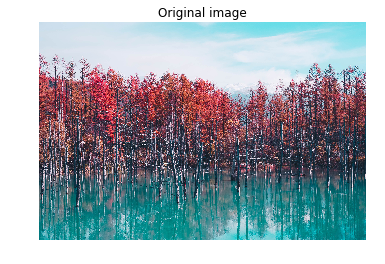

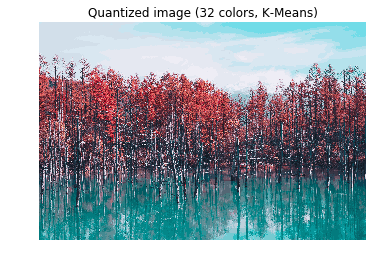

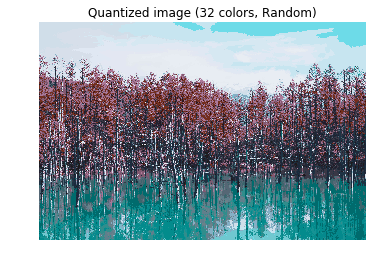

In [39]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(forest)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (32 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, width, height))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (32 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, width, height))
plt.show()